***Initial Setup***

In [44]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [45]:
# loading data

data = pd.read_csv('./datasets/zoo.data', header=None, names=['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'])
data['class'] = data['type'].replace({1: 'Mammal',2: 'Bird', 3: 'Reptile', 4: 'Fish',  5:'Amphibian', 6: 'Bug', 7: 'Invertebrate'})
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,Mammal
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,Bug
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrate


***Inspecting Data***

In [46]:
print(data.info(), '\n', data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
 18  class        101 non-null    object
dtypes: int64(17), object(2)
memor

All the columns except for 'legs' and 'type' are booleans, so its not very useful to look at statistical value for those column

<AxesSubplot:>

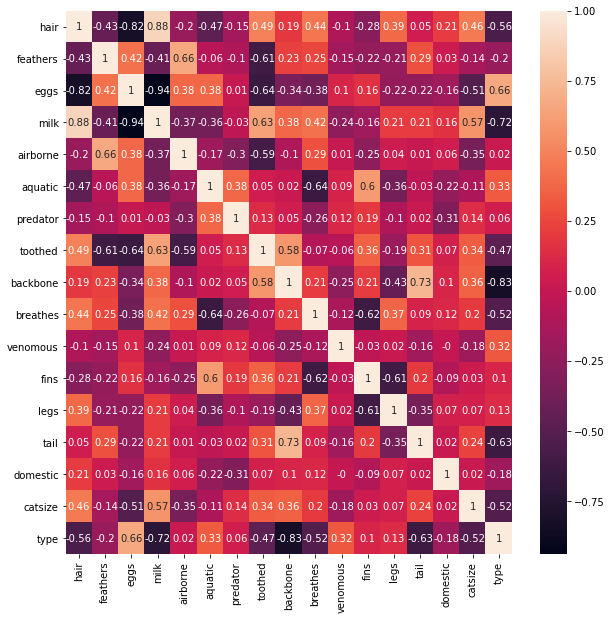

In [47]:
ctable = data.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(data=ctable, annot=True)

<AxesSubplot:xlabel='type', ylabel='count'>

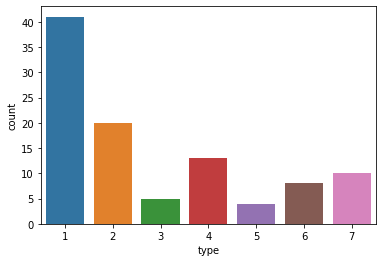

In [48]:
sns.countplot(data['type'],label="Count")

In [49]:
data['class'].value_counts()

Mammal          41
Bird            20
Fish            13
Invertebrate    10
Bug              8
Reptile          5
Amphibian        4
Name: class, dtype: int64

***Feature Engineering***

In [50]:
# defining X and y

X = np.array(data.drop(['animal_name', 'type', 'class'], axis=1))
y = np.array(data['type'])

In [51]:
# train-test splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Models***

In [52]:
# initializing and running Decision Tree model with default parameters

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'Predicted labels: {y_pred}')
print(f'Actual labels:    {y_test}')
print(f'Training score: {clf.score(X_train, y_train)}')
print(f'Testing score:  {clf.score(X_test, y_test)}')

Predicted labels: [1 1 1 1 1 6 1 1 1 1 4 6 6 2 7 1 1 2 4 1 5]
Actual labels:    [1 1 1 1 1 6 1 1 1 1 4 6 6 2 7 1 1 2 4 1 3]
Training score: 1.0
Testing score:  0.9523809523809523


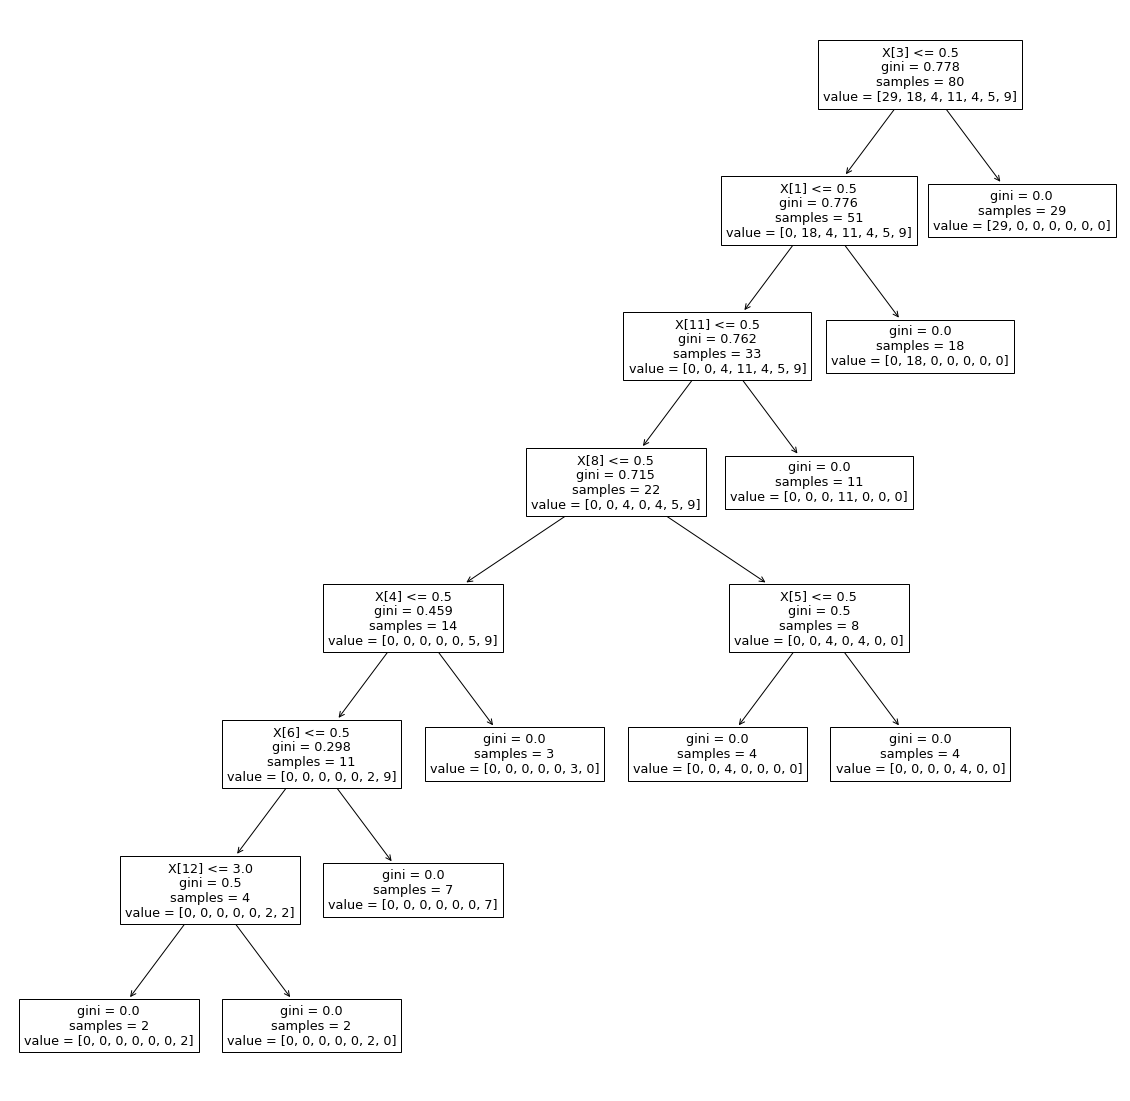

In [61]:
plt.figure(figsize=(20, 20))
tree.plot_tree(clf)
plt.show()

In [54]:
# playing with RandomizedSearchCV to find best parameters for Decision Tree

param = {'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': ['None', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 3, 4],
        'random_state': [42, 0, 13]}

trees = DecisionTreeClassifier()

tree_random = RandomizedSearchCV(trees, param)

tree_random.fit(X_train, y_train)

print(f"Best Decision Tree Parameters: {tree_random.best_params_}")
print(f"Best score is {tree_random.best_score_}")

Best Decision Tree Parameters: {'splitter': 'best', 'random_state': 13, 'min_samples_split': 2, 'max_depth': 6, 'criterion': 'entropy'}
Best score is 0.975


In [55]:
# initializing and running Random Forest with default parameters

rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(f'Predicted labels: {y_pred}')
print(f'Actual labels:    {y_test}')
print(f'Training score: {clf.score(X_train, y_train)}')
print(f'Testing score:  {clf.score(X_test, y_test)}')

Predicted labels: [1 1 1 1 1 6 1 1 1 1 4 6 6 2 7 1 1 2 4 1 4]
Actual labels:    [1 1 1 1 1 6 1 1 1 1 4 6 6 2 7 1 1 2 4 1 3]
Training score: 1.0
Testing score:  0.9523809523809523


In [56]:
# playing with RandomizedSearchCV to find best parameters for Random Forest

param = {'n_estimators' : [100, 200, 300, 400, 500],
        'criterion': ['gini', 'entropy'],
        'max_depth': ['None', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 3, 4],
        'bootstrap': ['True', 'False'],
        'random_state': [42, 0, 13]}

forest = RandomForestClassifier()

forest_random = RandomizedSearchCV(forest, param)

forest_random.fit(X_train, y_train)

print(f"Best Random Forest Parameters: {forest_random.best_params_}")
print(f"Best score is {forest_random.best_score_}")

Best Random Forest Parameters: {'random_state': 42, 'n_estimators': 400, 'min_samples_split': 3, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': 'False'}
Best score is 0.975
